# Classification

In [1]:
import pandas as pd

In [2]:
diabeties = pd.read_csv('/home/hdsingh/Desktop/AI/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabeties.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabeties.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabeties[cols_to_norm] = diabeties[cols_to_norm].apply(lambda x: (x- x.min())/(x.max() - x.min() ))

In [7]:
import tensorflow as tf

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
diabeties.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age') 

### Categorical Data

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

 #  assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',10)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

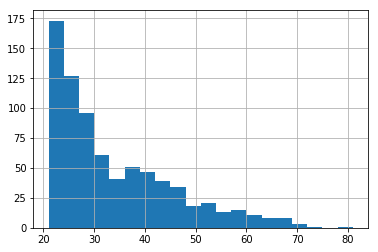

In [12]:
diabeties['Age'].hist(bins = 20)

In [13]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train test split

In [15]:
x_data = diabeties.drop('Class',axis = 1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [16]:
labels = diabeties['Class']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### tf.estimator

In [19]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [20]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd516c0b7b8>, '_keep_checkpoint_max': 5, '_task_id': 0, '_global_id_in_cluster': 0, '_train_distribute': None, '_model_dir': '/tmp/tmpzbunlnt5', '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_service': None, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_master': ''}


In [21]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzbunlnt5/model.ckpt.
INFO:tensorflow:step = 0, loss = 6.931472
INFO:tensorflow:global_step/sec: 178.18
INFO:tensorflow:step = 100, loss = 4.141654 (0.562 sec)
INFO:tensorflow:global_step/sec: 238.487
INFO:tensorflow:step = 200, loss = 6.038972 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.489
INFO:tensorflow:step = 300, loss = 4.5956492 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.055
INFO:tensorflow:step = 400, loss = 4.9411592 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.816
INFO:tensorflow:step = 500, loss = 4.9269824 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.982
INFO:tensorflow:step = 600, loss = 7.919373 (0.418 sec)
INFO:tensorflow:global_step/sec: 245.327
INFO:tensorflow:step 

In [22]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                     y = y_test,
                                                     batch_size=10, num_epochs=1, 
                                                      shuffle=False)

In [23]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-12:17:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzbunlnt5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-25-12:17:12
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72834647, accuracy_baseline = 0.65748036, auc = 0.78336436, auc_precision_recall = 0.62351674, average_loss = 0.5336969, global_step = 1000, label/mean = 0.34251967, loss = 5.213808, precision = 0.62857145, prediction/mean = 0.3529737, recall = 0.50574714


In [24]:
results

{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78336436,
 'auc_precision_recall': 0.62351674,
 'average_loss': 0.5336969,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.213808,
 'precision': 0.62857145,
 'prediction/mean': 0.3529737,
 'recall': 0.50574714}

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                     batch_size = 10,
                                                     num_epochs=1, 
                                                      shuffle=False)

In [26]:
predicitions = model.predict(pred_input_func)

In [27]:
my_pred = list(predicitions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzbunlnt5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.49554503], dtype=float32),
  'logits': array([-0.01782048], dtype=float32),
  'probabilities': array([0.50445503, 0.495545  ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.59653115], dtype=float32),
  'logits': array([0.3910321], dtype=float32),
  'probabilities': array([0.40346885, 0.59653115], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.38618752], dtype=float32),
  'logits': array([-0.46336633], dtype=float32),
  'probabilities': array([0.61381245, 0.38618752], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.29334894], dtype=float32),
  'logits': array([-0.8791742], dtype=float32),
  'probabilities': array([0.70665103, 0.29334894], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype

### DNN model

In [40]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10],
                                      feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd4ddd75e10>, '_keep_checkpoint_max': 5, '_task_id': 0, '_global_id_in_cluster': 0, '_train_distribute': None, '_model_dir': '/tmp/tmpd_tpj9aj', '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_service': None, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_master': ''}


#### Error due to categorical col

In [41]:
dnn_model.train(input_fn=input_func,steps =1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpd_tpj9aj/model.ckpt.
INFO:tensorflow:step = 0, loss = 6.8205233
INFO:tensorflow:Loss for final step: 6.8205233.


In [42]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [43]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,
                                                batch_size=10, 
                                                 num_epochs=1000, 
                                                 shuffle=True)

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10],
                                      feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd512415320>, '_keep_checkpoint_max': 5, '_task_id': 0, '_global_id_in_cluster': 0, '_train_distribute': None, '_model_dir': '/tmp/tmppnqqcedu', '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_service': None, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_master': ''}


In [46]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmppnqqcedu/model.ckpt.
INFO:tensorflow:step = 0, loss = 6.8724174
INFO:tensorflow:global_step/sec: 198.426
INFO:tensorflow:step = 100, loss = 6.946891 (0.505 sec)
INFO:tensorflow:global_step/sec: 269.477
INFO:tensorflow:step = 200, loss = 4.852857 (0.371 sec)
INFO:tensorflow:global_step/sec: 261.698
INFO:tensorflow:step = 300, loss = 4.9862375 (0.382 sec)
INFO:tensorflow:global_step/sec: 267.257
INFO:tensorflow:step = 400, loss = 7.2137213 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.117
INFO:tensorflow:step = 500, loss = 2.9511461 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.097
INFO:tensorflow:step = 600, loss = 5.4292464 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.121
INFO:tensorflow:st

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                      y = y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False,)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-12:36:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppnqqcedu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-25-12:36:10
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.8176062, auc_precision_recall = 0.66303146, average_loss = 0.5102718, global_step = 1000, label/mean = 0.34251967, loss = 4.984963, precision = 0.60215056, prediction/mean = 0.36774978, recall = 0.6436782


{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8176062,
 'auc_precision_recall': 0.66303146,
 'average_loss': 0.5102718,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.984963,
 'precision': 0.60215056,
 'prediction/mean': 0.36774978,
 'recall': 0.6436782}